In [95]:
from util import readSinogram
import matplotlib.pyplot as plt
from skimage.transform import iradon
import scipy as sp
import numpy as np

sinogramData = readSinogram("data/sinogram-patient.txt")
angles = np.loadtxt("data/angles.txt")
angles = np.deg2rad(angles)
sinogram = sinogramData[2]
nbprj = sinogramData[1]

In [ ]:
def do_recon(sinogram, angles):
    dim = sinogram.shape[1] # nombre de projections et dimension de l'image finale
    P = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(sinogram, axes=1), axis=1), axes=1) # On centre le DC (freq=0)
    P = P.ravel()
    # grille polaire dans l'espace de Fourier
    r = np.arange(dim) - dim / 2
    r, a = np.meshgrid(r, angles)
    r = r.ravel()
    a = a.ravel()
    srcx = (dim / 2) + r*np.cos(a)
    srcy = (dim / 2) + r*np.sin(a)
    # On construit une grille cartésienne qui servira pour l'interpolation
    dstx, dsty = np.meshgrid(np.arange(dim), np.arange(dim))
    dstx = dstx.ravel()
    dsty = dsty.ravel()
    fft2 = sp.interpolate.griddata((srcx, srcy), P, (dstx, dsty), method="nearest").reshape((dim, dim)) # Interpolation "voisins proches" 
    # de la grille polaire vers la grille cartésienne 
    recon = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fft2)))) # Retour dans l'espace temporel, on inverse tous les opérations 
    recon = np.rot90(recon.T, -1) # On réoriente l'image reconstruite
    return recon

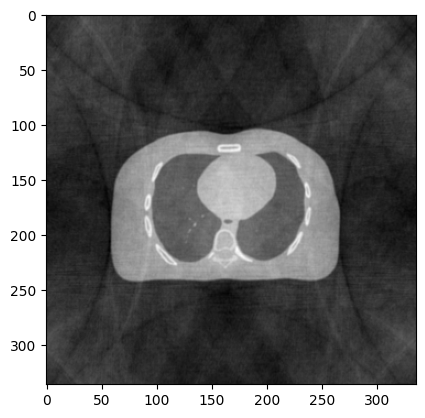

In [115]:
trial = do_recon(sinogram, angles)
plt.imshow(trial, cmap="gray")
plt.show()